In [0]:
import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.engine import Layer
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate, Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model
from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
# import random
import tensorflow as tf

In [5]:
# To upload from local drive
from google.colab import files   
uploaded = files.upload()
# ---------------------------------
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1298866571_b4c496b71c.jpg to 1298866571_b4c496b71c.jpg
Saving 1301140633_046e4e8010.jpg to 1301140633_046e4e8010.jpg
Saving 1302657647_46b36c0d66.jpg to 1302657647_46b36c0d66.jpg
Saving 1303335399_b3facd47ab.jpg to 1303335399_b3facd47ab.jpg
Saving 1303548017_47de590273.jpg to 1303548017_47de590273.jpg
Saving 1303727066_23d0f6ed43.jpg to 1303727066_23d0f6ed43.jpg
Saving 1303727828_d1052ee341.jpg to 1303727828_d1052ee341.jpg
Saving 1304961697_76b86b0c18.jpg to 1304961697_76b86b0c18.jpg
Saving 1305564994_00513f9a5b.jpg to 1305564994_00513f9a5b.jpg
Saving 1307635496_94442dc21a.jpg to 1307635496_94442dc21a.jpg
Saving 1308472581_9961782889.jpg to 1308472581_9961782889.jpg
Saving 1308617539_54e1a3dfbe.jpg to 1308617539_54e1a3dfbe.jpg
Saving 1309330801_aeeb23f1ee.jpg to 1309330801_aeeb23f1ee.jpg
Saving 1311388430_4ab0cd1a1f.jpg to 1311388430_4ab0cd1a1f.jpg
Saving 1312227131_771b5ed201.jpg to 1312227131_771b5ed201.jpg
Saving 1312954382_cf6d70d63a.jpg to 1312954382_cf6d70d63a.jpg
Saving 1

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


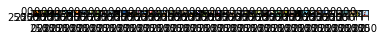

In [6]:
from PIL import Image
from numpy import array
import io            #To import the uploaded images into our dataframe
import matplotlib.pyplot as plt
%matplotlib inline

std_size=(256,256)     #standard size of images
X = []       # List containing all the images
i=1
for f in uploaded:                                                  # this
    image_data = uploaded[f] # byte values of the image             # this
    image = Image.open(io.BytesIO(image_data))                      # and this are part of the code to import images into our dataframe
    image=image.resize(std_size)
    plt.subplot(1, len(uploaded), i)
    plt.imshow(image)
    arr = array(image)
    # print(arr)
    print(arr.shape)
    X.append(arr)
    i +=1

In [7]:
split = int(0.80*len(X))
X_train = X[:split]
X_train = np.array( X_train, dtype=float )
X_train = 1.0/255*X_train       #Normalization
print(X_train.shape)
# array_to_img(Xtrain[1,:,:,:])

#Loading the weights
inception = InceptionResNetV2(weights='imagenet', include_top=True)
inception.graph = tf.get_default_graph()

(40, 256, 256, 3)













225214464/225209952 [==============================] - 17s 0us/step


In [8]:
embedding = Input(shape=(1000,))  #output of resnet....gives 1000 catogeries to classify
print(embedding.shape)

#Encoder
encoder_input = Input(shape=(256, 256, 1,))           # 1 because of L 
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)  #conv2d - layer   (64.....)-filter
print(encoder_output.shape)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
print(encoder_output.shape)

encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
print(encoder_output.shape)

#Fusion
fusion_output = RepeatVector(32 * 32)(embedding)                # 1000,1 32x32 times repeat
fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
fusion_output = concatenate([encoder_output, fusion_output], axis=3)    # 3d
fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output) 

#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)                                    # size of decoder_output will be 2 times
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)


(?, 1000)
(?, 128, 128, 64)
(?, 128, 128, 128)
(?, 64, 64, 128)
(?, 64, 64, 256)
(?, 32, 32, 256)
(?, 32, 32, 512)
(?, 32, 32, 512)
(?, 32, 32, 256)



In [9]:
model = Model(inputs=[encoder_input, embedding], outputs=decoder_output)
model.summary()           

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 128, 128, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 128, 128, 128 73856       conv2d_204[0][0]                 
__________________________________________________________________________________________________
conv2d_206 (Conv2D)             (None, 64, 64, 128)  147584      conv2d_205[0][0]                 
____________________________________________________________________________________________

In [13]:
#Create embedding
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)            #preprocess_input will automatically preprocess the input
    with inception.graph.as_default():
        embed = inception.predict(grayscaled_rgb_resized)
    return embed

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.3,#0.2
        zoom_range=0.3, #0.2
        rotation_range=25, #25
        horizontal_flip=True,
        vertical_flip= True)

#Generate training data
batch_size = 20

def image_a_b_gen(batch_size):
    for batch in datagen.flow(X_train, batch_size=batch_size):
        gray = rgb2gray(batch)
        grayscaled_rgb = gray2rgb(gray)
        embed = create_inception_embedding(grayscaled_rgb)
        lab_batch = rgb2lab(batch)               
        X_batch = lab_batch[:,:,:,0]                    #selects the grayscale layer
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128             #selects the two color layers, green–red and blue–yellow.
        yield ([X_batch, create_inception_embedding(grayscaled_rgb)], Y_batch)        #yield 

#Train model      
tensorboard = TensorBoard(log_dir="/output")
model.compile(optimizer='adam', loss='mse')
model.fit_generator(image_a_b_gen(batch_size), callbacks=[tensorboard], epochs=100, steps_per_epoch=20)

Epoch 1/100
20/20 [==============================] - 50s 3s/step - loss: 0.0583

Epoch 2/100
20/20 [==============================] - 36s 2s/step - loss: 0.0165
Epoch 3/100
20/20 [==============================] - 36s 2s/step - loss: 0.0166
Epoch 4/100
20/20 [==============================] - 36s 2s/step - loss: 0.0167
Epoch 5/100
20/20 [==============================] - 36s 2s/step - loss: 0.0166
Epoch 6/100
20/20 [==============================] - 36s 2s/step - loss: 0.0165
Epoch 7/100
20/20 [==============================] - 36s 2s/step - loss: 0.0164
Epoch 8/100
20/20 [==============================] - 36s 2s/step - loss: 0.0163
Epoch 9/100
20/20 [==============================] - 36s 2s/step - loss: 0.0163
Epoch 10/100
20/20 [==============================] - 36s 2s/step - loss: 0.0162
Epoch 11/100
20/20 [==============================] - 36s 2s/step - loss: 0.0162
Epoch 12/100
20/20 [==============================] - 36s 2s/step - loss: 0.0161
Epoch 13/100
20/20 [================

In [0]:
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("color_tensorflow_real_mode.h5")
saver = tf.train.Saver()

In [15]:
test = files.upload()

for fn in test.keys():    
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(test[fn])))

Saving 1352410176_af6b139734.jpg to 1352410176_af6b139734.jpg
Saving 1355703632_5683a4b6fb.jpg to 1355703632_5683a4b6fb.jpg
Saving 1355833561_9c43073eda.jpg to 1355833561_9c43073eda.jpg
Saving 1355935187_2c99648138.jpg to 1355935187_2c99648138.jpg
Saving 1355945307_f9e01a9a05.jpg to 1355945307_f9e01a9a05.jpg
Saving 1356543628_c13ebe38fb.jpg to 1356543628_c13ebe38fb.jpg
Saving 1357724865_4faf4e1418.jpg to 1357724865_4faf4e1418.jpg
User uploaded file "1352410176_af6b139734.jpg" with length 112072 bytes
User uploaded file "1355703632_5683a4b6fb.jpg" with length 161133 bytes
User uploaded file "1355833561_9c43073eda.jpg" with length 88518 bytes
User uploaded file "1355935187_2c99648138.jpg" with length 157754 bytes
User uploaded file "1355945307_f9e01a9a05.jpg" with length 87162 bytes
User uploaded file "1356543628_c13ebe38fb.jpg" with length 137053 bytes
User uploaded file "1357724865_4faf4e1418.jpg" with length 194236 bytes


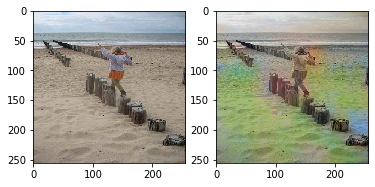

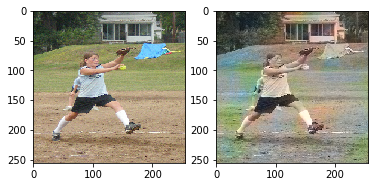

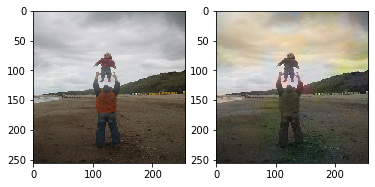

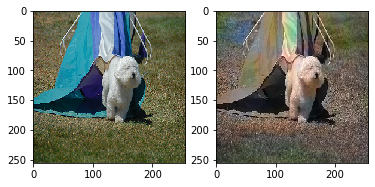

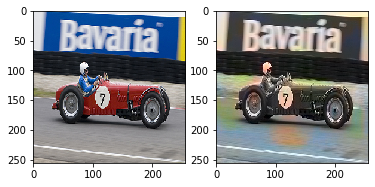

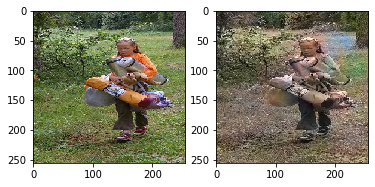

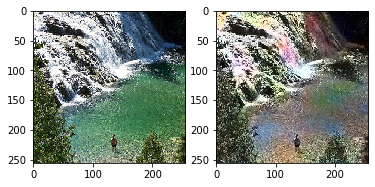

In [16]:
i=1
coloured = []
for f in test:
    image_data = test[f] # byte values of the image    
    image = Image.open(io.BytesIO(image_data))
    image=image.resize(std_size)
    arr = array(image)
    coloured.append(arr)
    i +=1

actual_image = list(coloured)
coloured = np.array(coloured, dtype=float)
coloured = 1.0/255*coloured
coloured = gray2rgb(rgb2gray(coloured)) # Leaves the dark features
coloured_embed = create_inception_embedding(coloured)
coloured = rgb2lab(coloured)[:,:,:,0]
coloured = coloured.reshape(coloured.shape+(1,))

# Test model
output = model.predict([coloured, coloured_embed])
output = output * 128

#Output colorizations
for i in range(0,len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = (coloured[i][:,:,0])
    cur[:,:,1:] = output[i]
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(actual_image[i])

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(lab2rgb(cur))

    plt.show()